In [72]:
import pandas as pd
# Import required libraries and dependencies

import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# SVC

In [3]:
attributes_df = pd.read_csv("../Resources/songAttributes_1999-2019.csv")
print(attributes_df.info())
attributes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        154931 non-null  int64  
 1   Acousticness      154931 non-null  float64
 2   Album             154931 non-null  object 
 3   Artist            154931 non-null  object 
 4   Danceability      154931 non-null  float64
 5   Duration          154931 non-null  int64  
 6   Energy            154931 non-null  float64
 7   Explicit          154931 non-null  bool   
 8   Instrumentalness  154931 non-null  float64
 9   Liveness          154931 non-null  float64
 10  Loudness          154931 non-null  float64
 11  Mode              154931 non-null  int64  
 12  Name              154931 non-null  object 
 13  Popularity        154931 non-null  int64  
 14  Speechiness       154931 non-null  float64
 15  Tempo             154931 non-null  float64
 16  TimeSignature     15

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [4]:
attributes_scaled_arr = StandardScaler().fit_transform(
    attributes_df[[
        "Danceability",
        "Duration",
        "Energy",
        "Explicit",
        "Instrumentalness",
        "Liveness",
        "Popularity",
        "Loudness",
        "Mode"
    ]]
)

attributes_scaled_df= pd.DataFrame(attributes_scaled_arr, columns=[[
        "Danceability",
        "Duration",
        "Energy",
        "Explicit",
        "Instrumentalness",
        "Liveness",
        "Popularity",
        "Loudness",
        "Mode"
    ]])
attributes_scaled_df

,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Popularity,Loudness,Mode
0,-0.330792,0.020763,1.140056,-0.521167,-0.264008,-0.822735,0.893636,0.720162,0.681208
1,0.032455,0.059148,0.302125,-0.521167,-0.312271,-0.346070,0.651309,0.749236,0.681208
2,-0.021139,-0.282493,1.200215,-0.521167,-0.313438,-0.674908,0.590727,1.130082,-1.467981
3,0.121778,-0.008229,0.095865,-0.521167,-0.315429,-0.608968,0.893636,0.715116,0.681208
4,-0.330792,-0.082353,0.727536,-0.521167,-0.315549,-0.751192,0.045490,0.834776,-1.467981
...,...,...,...,...,...,...,...,...,...
154926,1.020962,-0.263134,0.044300,-0.521167,-0.315596,-0.354689,3.619819,0.434707,-1.467981
154927,-0.634490,-0.231819,-0.033047,-0.521167,-0.315596,-0.492603,3.256328,0.350368,-1.467981
154928,1.205563,-0.167097,-0.209227,-0.521167,-0.315596,-0.707232,3.316909,0.595696,0.681208
154929,0.895910,-0.349762,0.396661,-0.521167,-0.315580,-0.696026,3.195746,0.414043,-1.467981


In [5]:
import numpy as np
# attributes_scaled_df.describe()
x = -0.2
attributes_scaled_df['Popularity'] = np.where((attributes_scaled_df['Popularity'] > x) & attributes_scaled_df['Popularity'].notna(), 1, 0)


In [6]:
attributes_scaled_df["Popularity"].value_counts()

(Popularity,)
1                80626
0                74305
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
data = attributes_scaled_df.copy()
data.drop(columns=["Popularity"],inplace=True)


C:\Users\Aspire-PC\AppData\Local\Temp\ipykernel_308\2660290603.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns=["Popularity"],inplace=True)


In [8]:
target = attributes_scaled_df["Popularity"]
target_names=["Popular","Not popular"]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear') # Search the meaning of the Kernel
model.fit(X_train, y_train)

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [10]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.565


In [11]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

     Popular       0.60      0.27      0.37     18568
 Not popular       0.55      0.84      0.67     20165

    accuracy                           0.56     38733
   macro avg       0.58      0.55      0.52     38733
weighted avg       0.58      0.56      0.53     38733



# CLEANING DATA

In [12]:
attributes_df

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154926,114,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,0.2190,88.011,4,0.840
154927,115,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Don't Want Your Money (feat. H.E.R.),74,0.0853,91.418,4,0.763
154928,116,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,0.2700,97.995,4,0.515
154929,117,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,0.1590,170.125,4,0.430


In [13]:
categorical_df = attributes_df.drop(columns=["Acousticness","Unnamed: 0", "Danceability","Duration","Energy","Explicit","Instrumentalness","Liveness","Loudness","Mode","Name","Speechiness","Tempo", "TimeSignature", "Valence"])
categorical_df


,Album,Artist,Popularity
0,Collective Soul (Deluxe Version),Collective Soul,35
1,Collective Soul (Deluxe Version),Collective Soul,31
2,Collective Soul (Deluxe Version),Collective Soul,30
3,Collective Soul (Deluxe Version),Collective Soul,35
4,Collective Soul (Deluxe Version),Collective Soul,21
...,...,...,...
154926,No.6 Collaborations Project,Ed Sheeran,80
154927,No.6 Collaborations Project,Ed Sheeran,74
154928,No.6 Collaborations Project,Ed Sheeran,75
154929,No.6 Collaborations Project,Ed Sheeran,73


In [14]:
x = 1.5
categorical_df['Popularity'] = np.where((categorical_df['Popularity'] > x) & categorical_df['Popularity'].notna(), 1, 0)
categorical_df["Artist"].value_counts()

Artist
Oakenfold         1797
Willie Nelson     1586
Bing Crosby       1434
Cash Cash         1406
Elvis Presley     1312
                  ... 
Vitamin C           31
Teairra Mari        31
Julianne Hough      27
Wham!               27
Chris Lake          21
Name: count, Length: 989, dtype: int64

In [15]:
df_05 = pd.read_csv("../Resources/riaaSingleCerts_1999-2019.csv")
print(df_05.info())
df_05.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   X           2601 non-null   int64 
 1   Name        2601 non-null   object
 2   Artist      2601 non-null   object
 3   RiaaStatus  2601 non-null   object
 4   Label       2601 non-null   object
dtypes: int64(1), object(4)
memory usage: 101.7+ KB
None


,X,Name,Artist,RiaaStatus,Label
0,0,Wish Wish,Dj Khaled,Gold,We the Best / Epic
1,1,Level Up,Ciara,1x Platinum,Beauty Marks Entertainment
2,2,Con Calma,Daddy Yankee,11x Diamond,Universal Music Latino / El Cartel Records
3,3,Wish you Were Gay,Billie Eilish,1x Platinum,Darkroom / Interscope Records
4,4,El Anillo,Jennifer Lopez,6x Multi-Platinum,Sony Latin


In [16]:
df_05.drop("X", axis=1, inplace=True)



In [17]:
merged_df = pd.merge(attributes_df, df_05, on=["Name", "Artist"], how ="inner")
merged_df.dropna()
merged_df.head()


,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence,RiaaStatus,Label
0,0,0.154000,All The Pain Money Can Buy,Fastball,0.653,257093,0.874,False,0.000014,0.307,-5.660,0,The Way,65,0.0341,120.840,4,0.902,Gold,Hollywood Records
1,38,0.178000,So Real,Mandy Moore,0.813,234133,0.836,False,0.000066,0.154,-4.230,1,Candy,10,0.0881,100.491,4,0.677,Gold,550 Music/Epic
2,25,0.435000,Ideal,Ideal,0.702,275173,0.520,False,0.000000,0.299,-8.581,1,Get Gone,35,0.0725,120.005,4,0.467,Gold,Virgin
3,48,0.000134,All The Good Sh**. 14 Solid Gold Hits (2000-2008),Sum 41,0.348,199493,0.951,False,0.004380,0.138,-5.026,0,The Hell Song,40,0.0771,173.409,4,0.672,Gold,Island Records
4,63,0.000140,All the Good Shit,Sum 41,0.352,199493,0.954,False,0.002710,0.092,-5.083,0,The Hell Song,29,0.0846,173.392,4,0.552,Gold,Island Records


In [18]:
patterns_and_labels = {
    r'.*Atlantic.*': 'Atlantic',
    r'.*Columbia.*': 'Columbia',
    r'.*Def Jam.*': 'Def Jam',
    r'.*Universal.*': 'Universal',
    r'.*Warner Bros..*': 'Warner Bros.',
    r'.*Capitol.*': 'Capitol',
    r'.*Rca.*': 'Rca',
    r'.*Republic.*': 'Republic',
    r'.*Island.*': 'Island',
    r'.*Interscope.*': 'Interscope',
    r'.*Hollywood.*': 'Hollywood',
    r'.*Arista.*': 'Arista',
    r'.*Sony.*': 'Sony',
    r'.*Mca.*': 'Mca',
    r'.*Roc.*': 'Roc',
    r'.*Warner.*': 'Warner',
    r'.*Glassnote.*': 'Glassnote',
    r'.*Epic.*': 'Epic',
    r'.*Geffen.*': 'Geffen',
    r'.*A&m.*': 'A&m',
    r'.*Bna.*': 'Bna',
    r'.*Virgin.*': 'Virgin',
}

for pattern, label in patterns_and_labels.items():
    merged_df['Label'] = merged_df['Label'].replace({pattern: label}, regex=True)

print(merged_df["Label"].value_counts())
print(merged_df["Label"].nunique())

Label
Atlantic              180
Interscope            113
Columbia              103
Def Jam               100
Republic               85
                     ... 
Giant                   1
s-Curve Records         1
Wheelhouse Records      1
Fearless Records        1
Monkeywrench            1
Name: count, Length: 95, dtype: int64
95


In [19]:
labels_to_replace = list(merged_df["Label"].value_counts()[merged_df["Label"].value_counts() < 3].index)

# Replace in dataframe
for i in labels_to_replace:
    merged_df['Label'] = merged_df['Label'].replace(i,"Other")
    
# Check to make sure binning was successful
merged_df['Label'].value_counts()

Label
Atlantic                     180
Interscope                   113
Columbia                     103
Def Jam                      100
Republic                      85
Rca                           84
Capitol                       71
Warner                        70
Universal                     66
Other                         61
Big Machine Records, Inc.     58
Arista                        57
Epic                          53
Island                        26
Hollywood                     20
Mercury                       16
Jive                          15
A&m                           15
Reprise                       15
Sony                          13
Bna                           12
Mca                           11
Elektra                       10
Geffen                        10
Sire                           9
Wind-Up Records                9
Laface                         9
Glassnote                      8
Curb Records                   8
Big Machine Records            8
j Re

## Random Forests | Binary Classification

In [59]:
merged_df.columns

Index(['Unnamed: 0', 'Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Popularity', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence', 'RiaaStatus', 'Label'],
      dtype='object')

In [61]:
clean_merged_df_01 = merged_df.drop(columns=['Unnamed: 0', 'Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence', 'RiaaStatus'])
clean_merged_df_01 = pd.get_dummies(clean_merged_df_01)
clean_merged_df_01["is_popular"] = (clean_merged_df_01["Popularity"] >= 40)
clean_merged_df_01 = clean_merged_df_01.drop(columns= ["Popularity"])
clean_merged_df_01.head(3)

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co,is_popular
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [62]:
X = clean_merged_df_01.copy()
X.drop("is_popular", axis=1, inplace=True)
X.head()

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
y = clean_merged_df_01["is_popular"].values.reshape(-1, 1)
y[:5]


array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [64]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [65]:
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
#Creating the Model
RF_model = RandomForestClassifier(n_estimators=500, random_state=78)
RF_model = RF_model.fit(X_train_scaled, y_train)

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [67]:
predictions = RF_model.predict(X_test_scaled)

In [68]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,105
Actual 1,33,178


Accuracy Score : 0.6057142857142858
Classification Report
              precision    recall  f1-score   support

       False       0.51      0.24      0.33       139
        True       0.63      0.84      0.72       211

    accuracy                           0.61       350
   macro avg       0.57      0.54      0.53       350
weighted avg       0.58      0.61      0.57       350



In [70]:
# Random Forests in sklearn will automatically calculate feature importance
importances = RF_model.feature_importances_
# We can sort the features by their importance
sorted(zip(RF_model.feature_importances_, X.columns), reverse=True)

[(0.11856783998559202, 'Label_Republic'),
 (0.06119996028883922, 'Label_Rca'),
 (0.046752447270466825, 'Label_Universal'),
 (0.04628788928640627, 'Label_Interscope'),
 (0.045831229746515385, 'Label_the Valory Music Co'),
 (0.04186797096539251, 'Label_Mca'),
 (0.03643307418236626, 'Label_Koch'),
 (0.0357856814307655, 'Label_Big Oomp Records'),
 (0.03307420618008062, 'Label_Curb Records'),
 (0.03241293500802485, 'Label_Reprise'),
 (0.03134142299538087, 'Label_Glassnote'),
 (0.02466795229330257, 'Label_Island'),
 (0.0235027380667532, 'Label_the Bicycle Music Company'),
 (0.022300620971220573, 'Label_Sire'),
 (0.017265212241566383, 'Label_Columbia'),
 (0.016546968680576535, 'Label_Sony'),
 (0.016425512715019585, 'Label_Wind-Up Records'),
 (0.014921208360255504, 'Label_Warner'),
 (0.014864850290303855, 'Label_Dreamworks Nashville'),
 (0.014822747277145902, 'Label_Stoney Creek Records'),
 (0.014433799137439085, 'Label_Bad Boy'),
 (0.014323172821503277, 'Label_Mercury Nashville'),
 (0.0140241

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

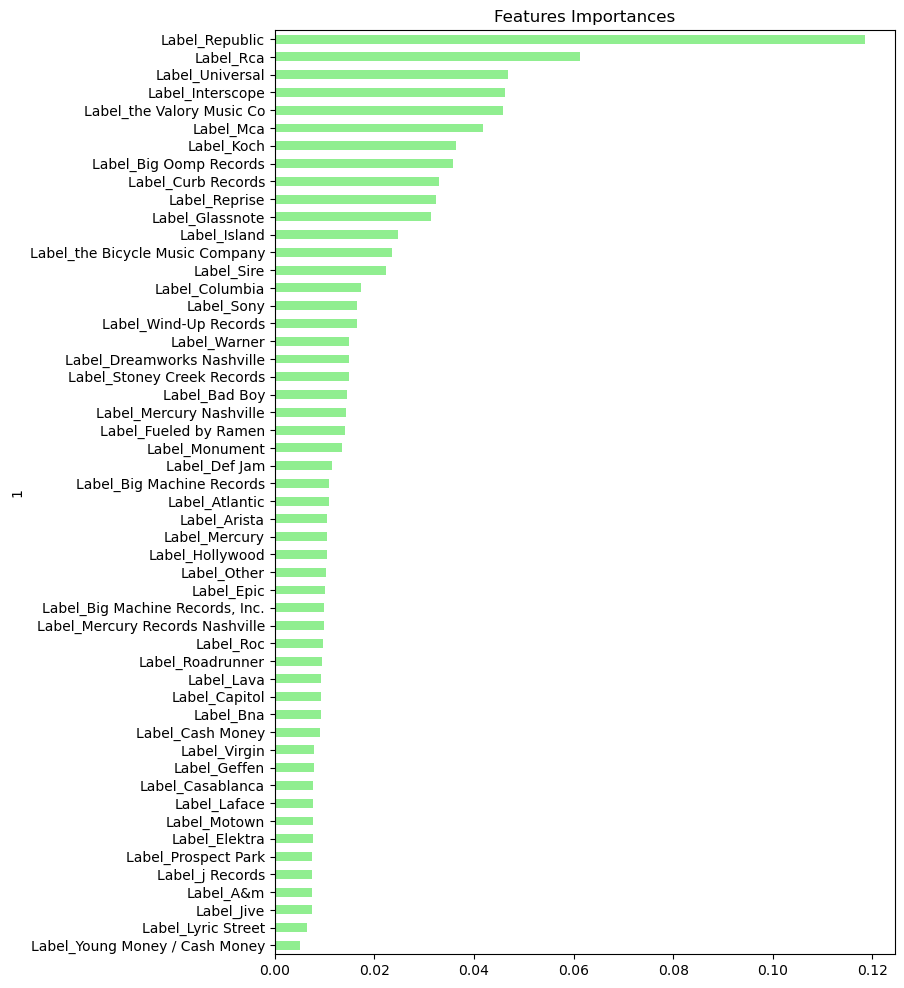

In [86]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(RF_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)

## Random Forests | Regression

In [74]:
clean_merged_df_02 = merged_df.drop(columns=['Unnamed: 0', 'Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence', 'RiaaStatus'])
clean_merged_df_02 = pd.get_dummies(clean_merged_df_02)
clean_merged_df_02.head(3)

,Popularity,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,35,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [75]:
X = clean_merged_df_02.copy()
X.drop("Popularity", axis=1, inplace=True)
X.head()

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
y = clean_merged_df_02["Popularity"].values.reshape(-1, 1)
y[:5]


array([[65],
       [10],
       [35],
       [40],
       [29]], dtype=int64)

In [77]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [78]:
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [79]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 500.91397862678326


In [80]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13007729256192244, 'Label_Republic'),
 (0.061775307569020346, 'Label_Rca'),
 (0.05867895219076865, 'Label_Universal'),
 (0.04976038730983636, 'Label_the Bicycle Music Company'),
 (0.045483156920914876, 'Label_Mca'),
 (0.0391691522139476, 'Label_Curb Records'),
 (0.036674345181149225, 'Label_Glassnote'),
 (0.036227936986062005, 'Label_Warner'),
 (0.03583534552394457, 'Label_Interscope'),
 (0.026596109595934076, 'Label_Reprise'),
 (0.02245901840135307, 'Label_Arista'),
 (0.022333466285434898, 'Label_Roc'),
 (0.02006967222596738, 'Label_Koch'),
 (0.019895250662866418, 'Label_the Valory Music Co'),
 (0.01880111405402226, 'Label_Sire'),
 (0.018519233797871074, 'Label_Big Oomp Records'),
 (0.01815481374497537, 'Label_Columbia'),
 (0.01732305052701002, 'Label_Wind-Up Records'),
 (0.01639350975340158, 'Label_Motown'),
 (0.01621319956543697, 'Label_j Records'),
 (0.01566289061586585, 'Label_Def Jam'),
 (0.015627998984211924, 'Label_Big Machine Records, Inc.'),
 (0.014329329282098655, 'Label

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

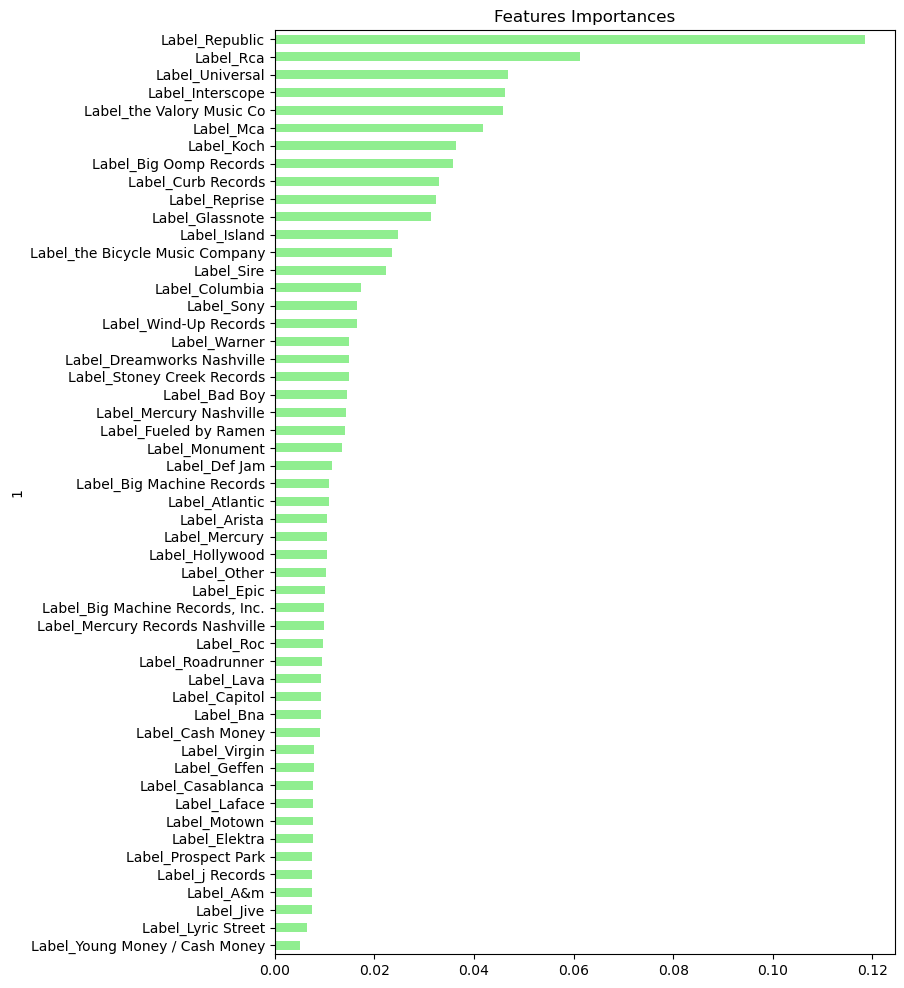

In [85]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(RF_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)